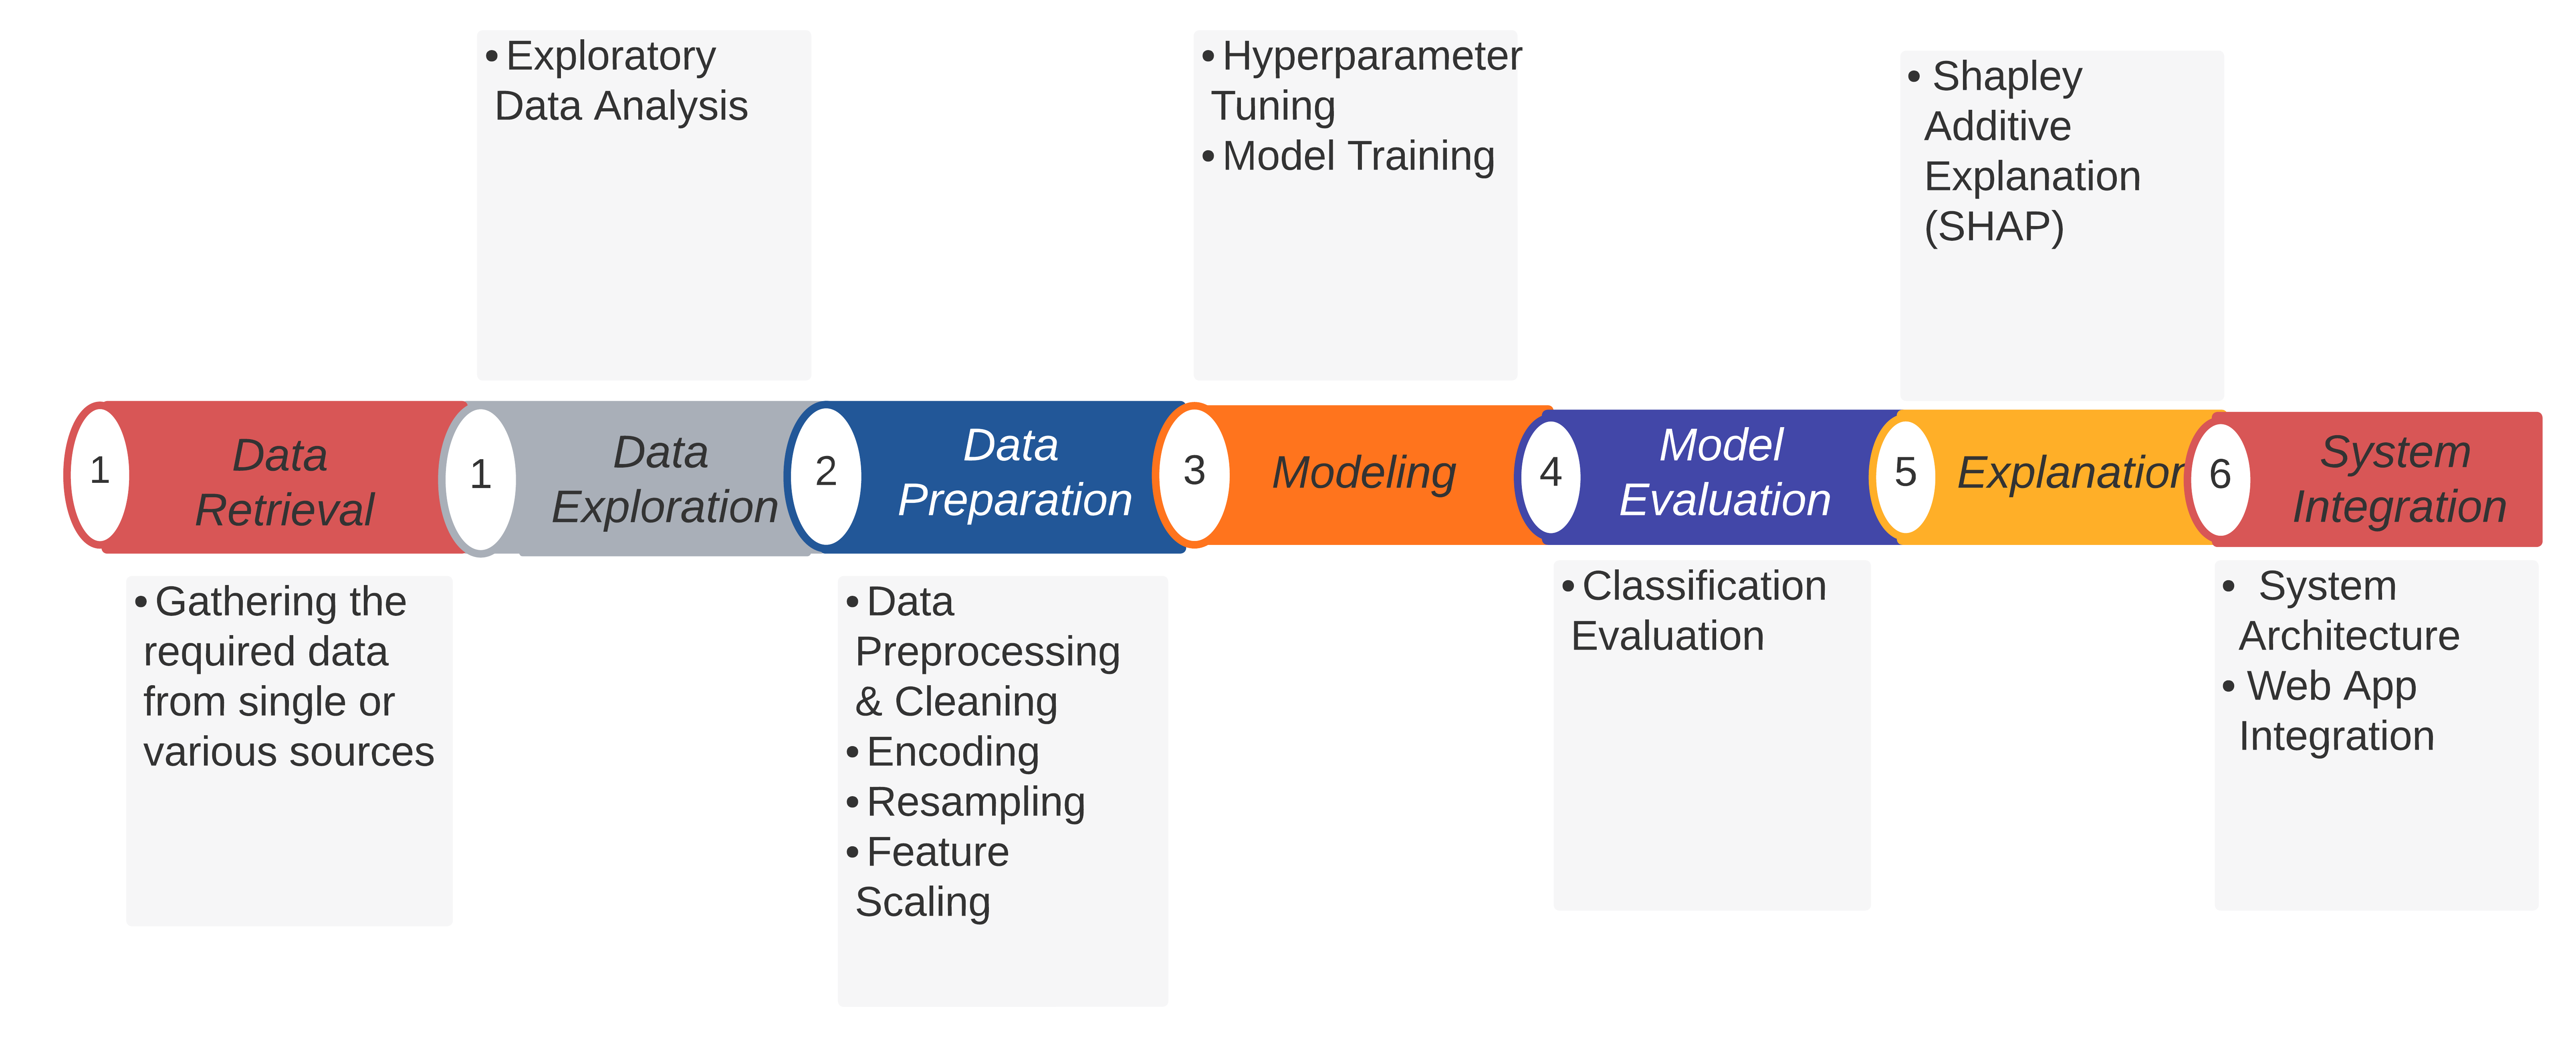

# DATA RETRIEVAL

### import the libraries

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict, Counter
import os
from tqdm import tqdm

from pprint import pprint

from dotenv import dotenv_values

# DATA EXPLORATION

### load the data

In [24]:
FILE_NAME = "UTI DATASET (LABELED).xlsx"
df = pd.read_excel(FILE_NAME)

In [25]:
display(df)

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.6,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,1-2,0-1,RARE,FEW,NONE SEEN,RARE,NEGATIVE
1433,42.0,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.010,0-2,0-2,RARE,NONE SEEN,NONE SEEN,RARE,NEGATIVE
1434,47.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,6.0,1.030,2-4,0-2,MODERATE,MODERATE,NONE SEEN,RARE,NEGATIVE
1435,57.0,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,5.0,1.030,0-2,0-2,PLENTY,PLENTY,NONE SEEN,FEW,NEGATIVE


### Univariate Analysis

In [81]:
def count_values(dataframe, categorical_var):
    values = {}
    for column in categorical_var:
        values[column] = Counter(dataframe[column])
        
    pprint(values)

count_values(df, ['Gender', 'Color', 'Transparency', 
                   'Glucose', 'Epithelial Cells', 
                   'Mucous Threads', 'Amorphous Urates', 'Bacteria'])

{'Amorphous Urates': Counter({'NONE SEEN': 1285,
                              'FEW': 72,
                              'RARE': 42,
                              'MODERATE': 19,
                              'PLENTY': 11,
                              'OCCASIONAL': 8}),
 'Bacteria': Counter({'RARE': 755,
                      'FEW': 434,
                      'MODERATE': 158,
                      'PLENTY': 77,
                      'OCCASIONAL': 9,
                      'LOADED': 4}),
 'Color': Counter({'YELLOW': 711,
                   'LIGHT YELLOW': 341,
                   'DARK YELLOW': 248,
                   'STRAW': 116,
                   'AMBER': 15,
                   'BROWN': 1,
                   'RED': 1,
                   'REDDISH': 1,
                   'REDDISH YELLOW': 1,
                   'LIGHT RED': 1,
                   nan: 1}),
 'Epithelial Cells': Counter({'RARE': 743,
                              'FEW': 347,
                              'MODERATE': 188,
  

In [82]:
def unique_values(dataframe, categorical_var):
    values = {}
    for column in categorical_var:
        print(column)
        values[column] = np.unique(dataframe[column])
        
    pprint(values)

unique_values(df, ['Gender', 'Color', 'Transparency', 
                   'Glucose', 'Epithelial Cells', 
                   'Mucous Threads', 'Amorphous Urates', 'Bacteria'])

Gender
Color


TypeError: '<' not supported between instances of 'str' and 'float'

In [88]:

np.version.version

'1.22.4'

In [58]:
# chi-square test
chisqt = pd.crosstab(df['Gender'], df['Diagnosis'], margins=True)
display(chisqt)

_, p_value, degrees_of_freedom = chi2_contingency(chisqt)[0:3]


alpha = 0.05
print(f"p value: {p_value}")
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')



Diagnosis,NEGATIVE,POSITIVE,All
Gender,,,
FEMALE,780,36,816
MALE,615,6,621
All,1395,42,1437


p value: 0.005237232497449331
Dependent (reject H0)


In [59]:
chisqt = pd.crosstab(df['Color'], df['Diagnosis'], margins=True)
display(chisqt)

_, p_value, degrees_of_freedom = chi2_contingency(chisqt)[0:3]

alpha = 0.05
print(f"p value: {p_value}")
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Diagnosis,NEGATIVE,POSITIVE,All
Color,,,
AMBER,15,0,15
BROWN,1,0,1
DARK YELLOW,240,8,248
LIGHT RED,1,0,1
LIGHT YELLOW,327,14,341
RED,1,0,1
REDDISH,1,0,1
REDDISH YELLOW,0,1,1
STRAW,114,2,116


p value: 0.012300285114873919
Dependent (reject H0)


In [60]:
chisqt = pd.crosstab(df['Transparency'], df['Diagnosis'], margins=True)
display(chisqt)

_, p_value, degrees_of_freedom = chi2_contingency(chisqt)[0:3]

alpha = 0.05
print(f"p value: {p_value}")
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Diagnosis,NEGATIVE,POSITIVE,All
Transparency,,,
CLEAR,1116,8,1124
CLOUDY,13,3,16
HAZY,86,18,104
SLIGHTLY HAZY,166,7,173
TURBID,14,6,20
All,1395,42,1437


p value: 1.383759434472291e-29
Dependent (reject H0)


# DATA PREPARATION

### complete-case analysis

In [27]:
df = df.dropna()

In [28]:
df.isna().sum()

Age                 0
Gender              0
Color               0
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
dtype: int64

In [29]:
k = df

### encoding

In [30]:
def encode_features(dataframe_, ordinal_features, nominal_features):
    
    MAPPING_REFERENCE = {'ABSENCE_REFERENCE': {'NONE SEEN':0, 
                         'RARE':1,
                        'FEW':2,
                        'OCCASIONAL':3,
                        'MODERATE':4,
                        'LOADED':5,
                        'PLENTY':6},
                        
                        'Color': {'LIGHT YELLOW':0,
                                 'STRAW':1,
                                 'AMBER':2,
                                 'BROWN':3,
                                 'DARK YELLOW':4,
                                 'YELLOW':5,
                                 'REDDISH YELLOW':6,
                                 'REDDISH':7,
                                 'LIGHT RED':8,
                                 'RED':9},
                         
                        'Transparency':{'CLEAR':0,
                                       'SLIGHTLY HAZY':1,
                                       'HAZY':2,
                                       'CLOUDY':3,
                                       'TURBID':4}}
    
    for ordinal in ordinal_features:
        if ordinal in ['Epithelial Cells', 'Mucous Threads', 'Amorphous Urates', 'Bacteria']:
            dataframe_[ordinal] = dataframe_[ordinal].map(MAPPING_REFERENCE['ABSENCE_REFERENCE'])
        else:
            print(ordinal)
            dataframe_[ordinal] = dataframe_[ordinal].map(MAPPING_REFERENCE[ordinal])
            
    for nominal in nominal_features:
        dataframe_ = pd.concat([dataframe_, pd.get_dummies(dataframe_[nominal])], axis=1).drop(nominal, axis=1)
        
    return dataframe_

df = encode_features(df, 
               ['Transparency', 
                'Epithelial Cells', 
                'Mucous Threads', 
                'Amorphous Urates', 
                'Bacteria',
                'Color'],
              ['Gender'])

df

Transparency
Color


,Age,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,FEMALE,MALE
0,76,0,0,NEGATIVE,NEGATIVE,5,1.010,1-3,0-2,3,1,0,3,1,0
1,9,4,1,NEGATIVE,1+,5,1.030,1-3,0-2,1,2,2,4,0,1
2,12,0,1,NEGATIVE,TRACE,5,1.030,0-3,0-2,1,2,4,1,0,1
3,77,3,3,NEGATIVE,1+,6,1.020,5-8,LOADED,1,1,0,2,0,1
4,29,5,2,NEGATIVE,TRACE,6,1.025,1-4,0-2,1,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,0.6,5,0,NEGATIVE,NEGATIVE,6,1.015,1-2,0-1,1,2,0,1,0,1
1434,42,5,0,NEGATIVE,NEGATIVE,6.5,1.010,0-2,0-2,1,0,0,1,0,1
1435,47,4,0,NEGATIVE,TRACE,6,1.030,2-4,0-2,4,4,0,1,1,0
1436,57,4,0,NEGATIVE,TRACE,5,1.030,0-2,0-2,6,6,0,2,1,0


### SMOTE

In [31]:
X = df[['Age', 'Transparency', 'pH', 'Specific Gravity', 'WBC', 'RBC',
       'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates', 'Bacteria', 'Female', 'Male', 'Light Red', 'Red', 'White', 'Yellow',
       'Yellow White', 'Glucose: Negative', 'Glucose: Positive',
       'Protein: Negative', 'Protein: Positive']]

y = df['Diagnosis']

oversample = SMOTE()

def wrapper(func):
    def inner(*args):
        X, y = args
        encoded_y = y.map({"Without UTI":0, "With UTI":1})
        return func(X, encoded_y)
    return inner

encode_and_oversample = wrapper(oversample.fit_resample)

X, y = encode_and_oversample(X, y)

In [34]:
X

,Age,Transparency,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,...,Male,Light Red,Red,White,Yellow,Yellow White,Glucose: Negative,Glucose: Positive,Protein: Negative,Protein: Positive
0,46,1,8.708709,1.018541,1,0,2,2,3,3,...,1,0,0,0,1,0,1,0,0,1
1,23,1,8.143143,1.029649,0,1,3,1,0,3,...,0,0,0,0,1,0,1,0,0,1
2,46,0,7.342342,1.005243,4,0,0,2,2,1,...,0,0,0,0,1,0,0,1,0,1
3,45,0,8.013013,1.022568,3,1,1,3,3,2,...,0,0,0,0,1,0,0,1,0,1
4,39,1,9.524525,1.023027,3,1,3,0,3,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,37,0,9.251089,1.024009,1,0,2,1,3,3,...,1,0,0,0,0,1,1,0,0,1
1014,38,1,8.932718,1.020878,2,0,1,1,2,0,...,0,0,0,0,0,0,0,1,1,0
1015,45,0,9.048091,1.022284,3,0,2,3,2,1,...,0,0,0,0,0,0,0,0,0,1
1016,31,0,8.280011,1.026110,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


,0
0,509
1,509


1.35 * Proportion Chance Criterion: 67.5


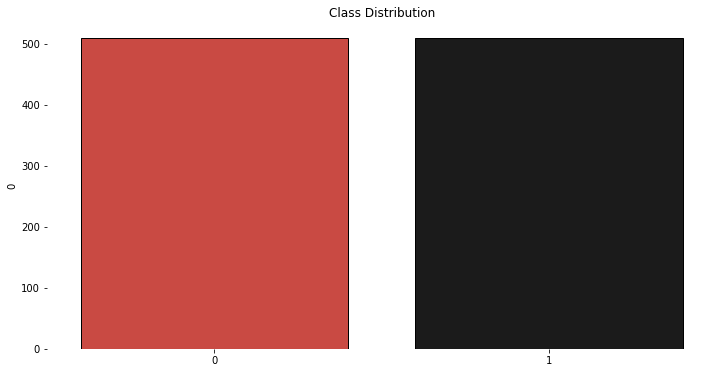

In [39]:
def performance_baseline(dataframe_, target_name, PCC = False, weight = 1.35):
    """
        Calculates the performance baseline (weight multiplied by PCC or Proportion Chance Criterion) and plots the distribution of the target.

        Parameters
        ------------
        dataframe_ : pandas.core.frame.DataFrame
              the dataframe that contains the categorical features to encode
        target_name : str
              the name of the target to plot
        PCC : bool; default = False
              if True, calculates the PCC and prints out the results, if False, it will just plot the distribution
        weight : float; default = 1.35
                the specific weight multiplied by PCC

        Returns
        ------------
        None
    """
    
    state_counts = Counter(dataframe_[target_name])
    df_state = pd.DataFrame.from_dict(state_counts, orient='index')

    fig, axs = plt.subplots(figsize=(12, 6))

    for spine in ['top', 'bottom', 'left', 'right']:
        axs.spines[spine].set_visible(False)

    sns.barplot(x=df_state.index, y=df_state[0], palette = ['#df362d', '#1b1b1b'], ec='k')
    plt.title("Class Distribution")

    if PCC:
        df = pd.DataFrame()
        num = (df_state[0]/df_state[0].sum())**2

        display(df_state)
        print(f"{weight} * Proportion Chance Criterion: {weight*100*num.sum()}")

performance_baseline(df, 'Diagnosis', PCC = True)

### feature scaling

In [ ]:
def normalize_splits(dataframe, X, y, test_size_, random_state_, continuous_features, categorical_features):
    """
      it normalizes only the continous feature in the dataframe using MinMaxScaler.

      Parameters
      ------------
      dataframe : pandas.core.frame.DataFrame
          the dataframe to be normalized

      test_size_ : float
          the test size for train_test_split

      random_state_ : int
          random state for train_test_split

      X : pandas.core.frame.DataFrame
          a pandas dataframe that contains all the features

      y : pandas.core.frame.DataFrame
          a pandas dataframe that contains the target or dependent variable
          
      continuous_features: list
          a list of continous features (string) e.g ['feature1', 'feature2']
        
      categorical_features : list
          a list of categorical features (string) e.g ['feature1', 'feature2']

      Returns
      ------------
      scaled_splits : tuple
          returns the dataframe with the X and y splitted and normalized

      unscaled_splits : list
          returns the dataframe with the X and y splitted and NOT normalized

    """

    scaler_ = MinMaxScaler()

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = test_size_,
                                                    random_state = random_state_,
                                                    stratify = y)


    scaler_.fit(X_train[continuous_features])

    X_train_scaled = scaler_.transform(X_train[continuous_features])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = continuous_features)

    X_train_scaled = pd.concat([X_train_scaled, X_train[categorical_features].reset_index(drop=True)], axis=1)

    X_test_scaled = scaler_.transform(X_test[continous_features])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = continous_features)

    X_test_scaled = pd.concat([X_test_scaled, X_test[categorical_features].reset_index(drop=True)], axis=1)

    scaled_splits = (X_train_scaled, X_test_scaled, y_train, y_test)
    unscaled_splits = [X_train, X_test, y_train, y_test]
    return scaled_splits, unscaled_splits

# MODELING

# MODEL EVALUATION

# EXPLANATION